# TP2: Support Vector Machine (SVM)

*By Daniel Deutsch and Kevin Kühl*

In [2]:
import warnings

import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import multivariate_normal
from sklearn import svm
from sklearn.datasets import make_blobs, make_circles
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV, cross_validate, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.utils import shuffle

In [3]:
# Warnings
warnings.filterwarnings('ignore')

# Matplotlib styles
plt.style.use('ggplot')
plt.rcParams.update({
    'figure.figsize': (15, 4),
    'axes.prop_cycle': plt.cycler(color=["#4C72B0", "#C44E52", "#55A868", "#8172B2", "#CCB974", "#64B5CD"]),
    'axes.facecolor': "#EAEAF2"
})

# Exercise 1

Show that the primal problem solved by the SVM can be rewritten as follows :

$$ \text{argmin}_{\mathbf{w} \in \mathcal{H}, w_0 \in \mathbb{R} } \left( \frac{1}{2}||\mathbf{w}||^2 + C \sum_{i=1}^n [ 1 - y_i ( \langle \mathbf{w}, \Phi(\mathbf{x_i}) \rangle + w_0 )]_+ \right) $$

**Solution:**

From the expression of the primal problem shown below:

<br>

\begin{aligned}
    \begin{cases}
        (\mathbf{w}^*, \omega_0^*, \xi^* \in \mathbb{R}^n) \in \underset{\mathbf{w} \in \mathcal{H}, w_0 \in \mathbb{R}, \xi \in \mathbb{R}^n}{\text{arg min}} \left( \frac{1}{2}||\mathbf{w}||^2 + C \sum_{i=1}^n \xi_i \right) \\
        \xi_i \geq 0 & \forall i \in {1, ..., n} \\
        y_i (\langle \mathbf{w}, \phi(x_i) \rangle  + \ \omega_0) \geq 1 - \xi_i & \forall i \in {1, ..., n}
    \end{cases}
\end{aligned}

<br>

Observing that the objective function is strictly increasing with respect to $\xi_i > 0$ (as $C$ is greater than 0) and isolating $\xi_i$ in the second constraint we get:

<br>

\begin{aligned}
     \xi_i & = \text{max} (0, \ 1 - y_i (\langle  \mathbf{w}, \phi(x_i) \rangle  + \ \omega_0) ) & \forall i \in {1, ..., n} \\
     & = [1 - y_i (\langle  \mathbf{w}, \phi(x_i) \rangle  + \ \omega_0)]_+
\end{aligned}

<br>

Which yields that:

<br>

\begin{aligned}
     \underset{\mathbf{w} \in \mathcal{H}, w_0 \in \mathbb{R}}{\text{arg min}} \left( \frac{1}{2}||\mathbf{w}||^2 + C \sum_{i=1}^n [ 1 - y_i ( \langle \mathbf{w}, \Phi(\mathbf{x_i}) \rangle + w_0 )]_+ \right)
\end{aligned}

# Exercise 2

Explain the sentence: "an SVM minimizes the classification error using a convex upper bound". The function $x \rightarrow [1 - x]_+ = \text{max}(0, 1-x)$ is called *Hinge*. Explain the difference between the pivotal loss and the loss of binary classification.

**Solution:**

To analyse the sentence, let us shed a light over the ideal loss function for a binary classificator (the 0-1 indicator) and compare it to the hinge loss function.


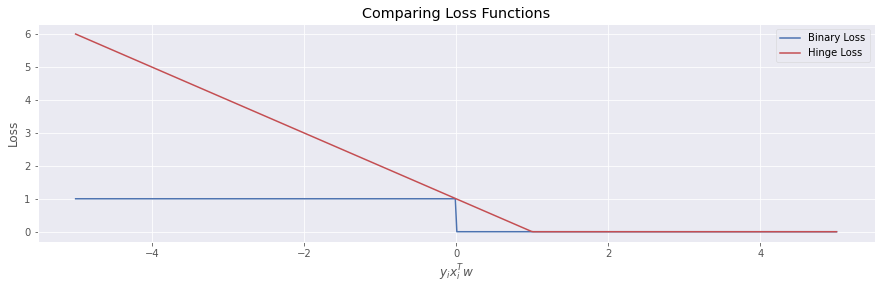

In [4]:
def indicator(x):
    return [int(i <= 0) for i in x]

def hinge(x):
    return [max(0, 1-i) for i in x]


# Defines an interval to plot
x = np.linspace(-5, 5, 500)

# Plots the loss functions
plt.figure(figsize=(15, 4))
plt.plot(x, indicator(x), label="Binary Loss")
plt.plot(x, hinge(x), label="Hinge Loss")
plt.title("Comparing Loss Functions")
plt.xlabel(r'$y_i x_i^T w$')
plt.ylabel("Loss")
plt.legend()
plt.show()

Clearly from its definition, the Binary Loss (indicator function) function is not convex. The alternative is using the Hinge Loss, which presents greater error values for $y_ix_i^Tw < 1$, but same loss (zero) for $y_ix_i^Tw \geq 1$. Thus, in that sense, the Hinge Loss is a upper bound for the 0-1 Binary Loss function. This increase in loss values is totally weigthed by the convexity, which allows much easier computations. Despite not being smooth, the Hinge function accepts subgradients with respect to $w$.

As for the difference between pivotal loss and loss of binary classification, we have:

- **Pivotal Loss:** Defined as $f(x) = max(0, 1 - y_ix_i^Tw)$, which allows for a soft transition between maximum and minimum loss values and adds the convexity characteristic to the function, what is highly desirable. 
- **Loss of Binary Classification:** Defined as $f(x) = \mathbb{1}\{y_ix_i^Tw > 0\}$, this is the ideal loss function, as it represents exactly the fitting of a classified input when compared to its label. Unfortunatelly, this is not convex, which is very impeditive to function optimization.

# Exercise 3

Draw an i.i.d. sample from a mixture of two Gaussian distrtibutions: each class is a Gaussian with specific parameters. This time, use the function make_blobs available in sklearn.datasets library. Reserve 75% of the data for training and 25% for the test data.

**Solution:**


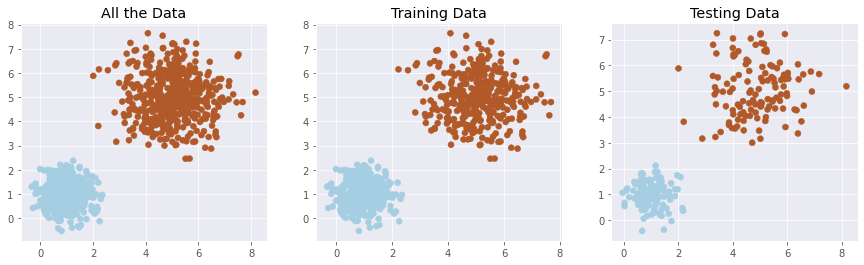

In [5]:
# Defines the Gaussians parameters
g_means = [1, 1, 5, 5]
g_stds = [0.5, 1]

# Generating data
X, y = make_blobs(n_samples=1000, n_features=2, cluster_std=g_stds, centers=[ g_means[0:2], g_means[2:4] ], random_state=0)

# Splits data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# Defines a ploting template
fig, axs = plt.subplots(1, 3, figsize=(15, 4))

# Plots all the data
axs[0].scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
axs[0].title.set_text("All the Data")

# Plots the training data
axs[1].scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.Paired)
axs[1].title.set_text("Training Data")

# Plots the testing data
axs[2].scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=plt.cm.Paired)
axs[2].title.set_text("Testing Data")

plt.show()

# Exercise 4

Since the probability distributions are known, numerically estimate the Bayes risk.

**Solution:**


In [6]:
# Defines covariance matrixes
cov0 = [
    [0.25, 0],
    [0, 0.25]
]
cov1 = [
    [1, 0],
    [0, 1]
]

# Parameters for Monte Carlo esimation
n = 100000
bayes_risk = 0

# Using the 0-1 loss
# Computing the integral with the PDF from above described Gaussians
multinormal_class0 = multivariate_normal(mean=g_means[0:2], cov=[[0.25,0],[0,0.25]])
multinormal_class1 = multivariate_normal(mean=g_means[2:4], cov=[[1,0],[0,1]])

for i in range(n):
    x1 = np.random.uniform(-10,10)
    x2 = np.random.uniform(-10,10)
    max_prob = max(multinormal_class0.pdf([x1,x2]), multinormal_class1.pdf([x1,x2]))
    prob_sum = multinormal_class0.pdf([x1,x2]) + multinormal_class1.pdf([x1,x2])
                                                                       
    bayes_risk += (1 - max_prob/prob_sum)

print(f"Estimated Bayes Risk is: {bayes_risk/n:.5f}")

Estimated Bayes Risk is: 0.00725


# Exercise 5

Draw the decision boundary H induced by SVM as well as the hyperplanes H1 and H−1. Vary the parameter C to see its impact on the number of support vectors. We can use the example https://scikit-learn.org/stable/auto_examples/svm/plot_separating_hyperplane.html.

**Solution:**

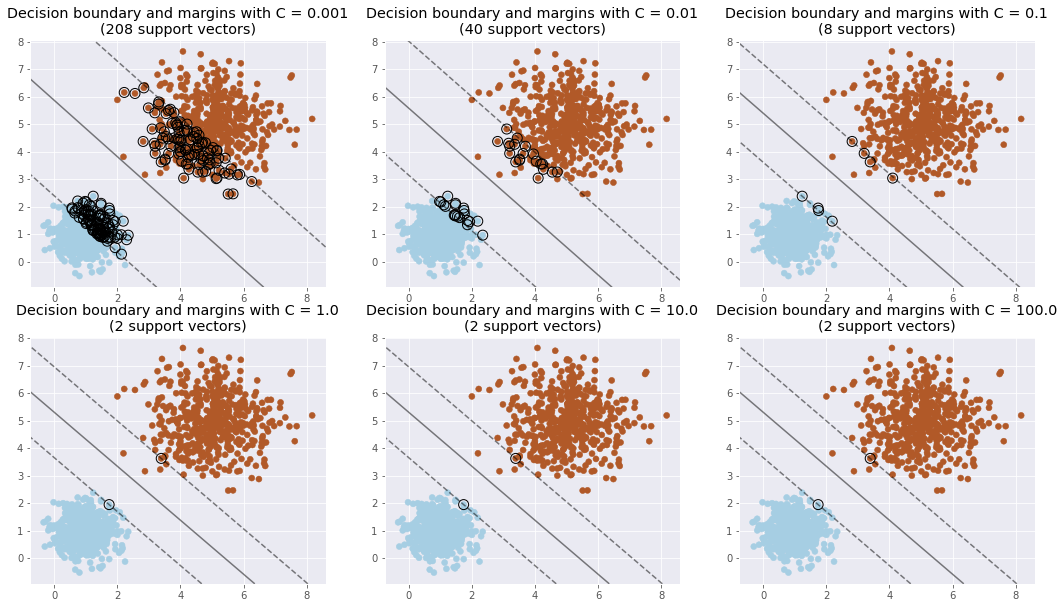

In [7]:
# Defines the regularization parameters that are going to be tested
Cs = np.logspace(-3, 2, 6)

# Defines a ploting template
fig, axs = plt.subplots(-(-len(Cs)//3), 3, figsize=(18, 10))

for i, C in enumerate(Cs):

    # Creates a model with the training data
    clf = svm.SVC(kernel='linear', C=C)   # Creates the model
    clf.fit(X_train, y_train)             # Trains the model

    # Obtains the current ax
    ax = axs[i//3, i%3]

    # Plots all the data
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
    ax.title.set_text(f"Decision boundary and margins with C = {C}\n({len(clf.support_vectors_)} support vectors)")

    # Obtains the hyperplanes
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = clf.decision_function(xy).reshape(XX.shape)

    # Plots the hyperplanes
    ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])

    # Highlight the support vectors
    ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100, linewidth=1, facecolors='none', edgecolors='k')

plt.show()

# Exercise 6

Define the Gaussian classes such that the two distributions overlap. Draw an i.i.d. sample from the joint probability distribution. Apply a 5-fold Cross-Validation to find the optimal parameter C∗ to classify this new dataset using a linear kernel.

**Solution:**


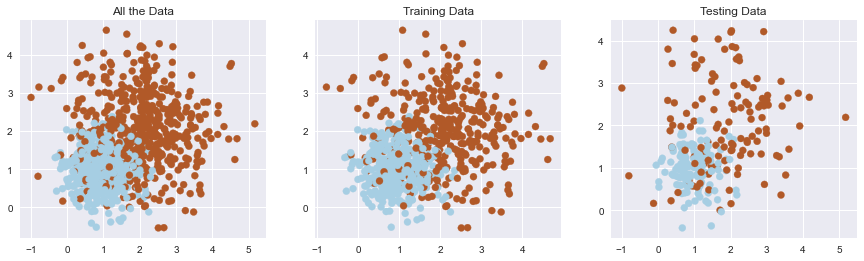

In [8]:
# Generate data and verify graphically that the two classes overlap
X, y = make_blobs(n_samples=1000, n_features=3, cluster_std=[0.5, 1], centers=[(1, 1), (2, 2)], random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# Defines a ploting template
_, axs = plt.subplots(1, 3, figsize=(15, 4))

# Plots all the data
axs[0].scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
axs[0].title.set_text("All the Data")

# Plots the training data
axs[1].scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.Paired)
axs[1].title.set_text("Training Data")

# Plots the testing data
axs[2].scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=plt.cm.Paired)
axs[2].title.set_text("Testing Data")

plt.show()

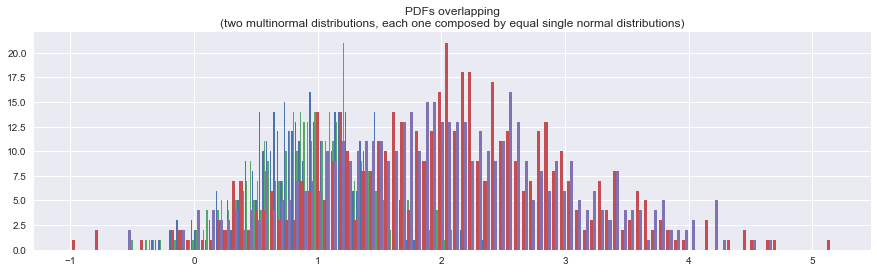

In [9]:
# Plots the histograms of the data to show overlap
plt.figure(figsize=(15, 4))
plt.hist(X[y==0], bins=100)
plt.hist(X[y==1], bins=100)
plt.title("PDFs overlapping\n(two multinormal distributions, each one composed by equal single normal distributions)")
plt.show()

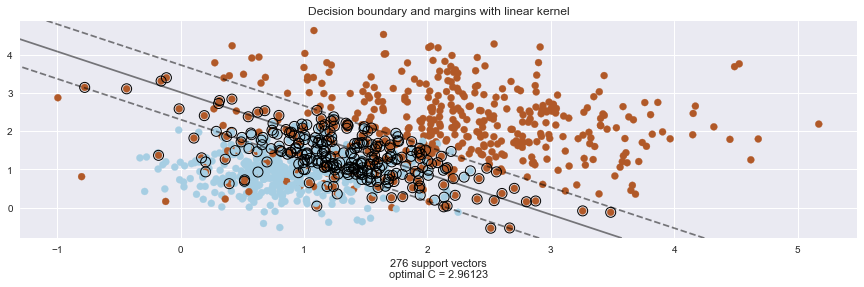

In [10]:
# Sets the parameters for the grid search
params = {
    'kernel': ['linear'], 
    'C': np.logspace(-3, 1, 1000)
}

# Performs a grid search with 5-fold cross validation
clf = GridSearchCV(svm.SVC(), params, cv=5, n_jobs=-1)
clf.fit(X_train, y_train)

# Sets the results obtained with the grid search
C = clf.best_params_['C']
clf = clf.best_estimator_

# Plots all the data
plt.figure(figsize=(15, 4))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
plt.title(f"Decision boundary and margins with linear kernel")

# Obtains the current ax
ax = plt.gca()

# Obtains the hyperplanes
xlim = ax.get_xlim()
ylim = ax.get_ylim()
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)

# Plots the hyperplanes
plt.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])

# Highlight the support vectors
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100, linewidth=1, facecolors='none', edgecolors='k')

# Adds relevant results at the bottom
plt.xlabel(f"{len(clf.support_vectors_)} support vectors\noptimal C = {C:.5f}") 

plt.show()

# Exercise 7

Show how tuning SVM hyperparameters on training data, for example by taking a Gaussian kernel (the parameters are therefore gamma and C), can lead to overfitting.

**Solution:**


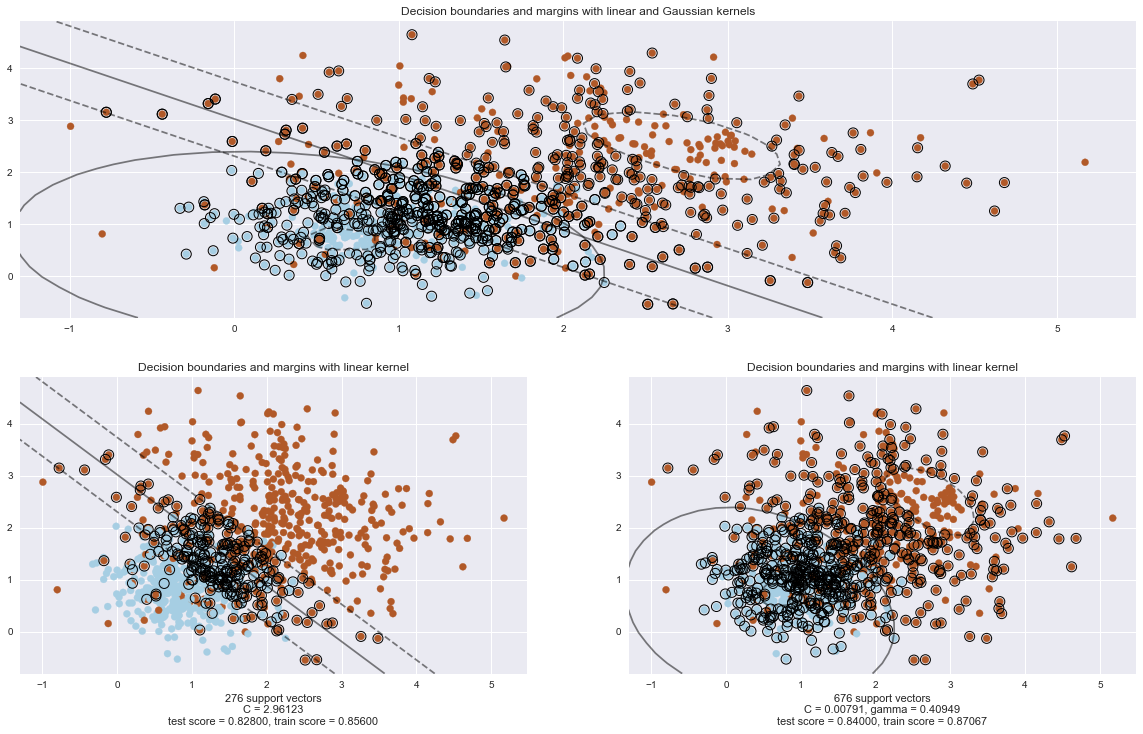

In [11]:
# Saves the results of the linear kernel
C_linear = C
clf_linear = clf
test_score_linear = clf.score(X_test, y_test)
train_score_linear = clf.score(X_train, y_train)

# Sets the parameters for the grid search
params = {
    'kernel': ['rbf'], 
    'C': np.logspace(-3, 1, 50),
    'gamma': np.logspace(-3, 1, 50)
}

# Performs a grid search with cross validation
clf = GridSearchCV(svm.SVC(), params, n_jobs=-1)
clf.fit(X_train, y_train)

# Sets the results obtained with the cross validation
C = clf.best_params_['C']
gamma = clf.best_params_['gamma']
clf = clf.best_estimator_

# Saves the results of the Gaussian kernel
C_rbf = C
clf_rbf = clf
gamma_rbf = gamma
test_score_rbf = clf.score(X_test, y_test)
train_score_rbf = clf.score(X_train, y_train)

# Defines a ploting template
fig = plt.figure(figsize=(20, 12))
gs = gridspec.GridSpec(2, 2)
axs = [fig.add_subplot(gs[0, :]), fig.add_subplot(gs[1, 0]), fig.add_subplot(gs[1, 1])]

# Plots both linear and Gaussian results
axs[0].scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
axs[0].title.set_text(f"Decision boundaries and margins with linear and Gaussian kernels")
xlim = axs[0].get_xlim()
ylim = axs[0].get_ylim()
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z_linear = clf_linear.decision_function(xy).reshape(XX.shape)
Z_rbf = clf_rbf.decision_function(xy).reshape(XX.shape)
axs[0].contour(XX, YY, Z_linear, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])
axs[0].scatter(clf_linear.support_vectors_[:, 0], clf_linear.support_vectors_[:, 1], s=100, linewidth=1, facecolors='none', edgecolors='k')
axs[0].contour(XX, YY, Z_rbf, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])
axs[0].scatter(clf_rbf.support_vectors_[:, 0], clf_rbf.support_vectors_[:, 1], s=100, linewidth=1, facecolors='none', edgecolors='k')

# Plots linear results
axs[1].scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
axs[1].title.set_text(f"Decision boundaries and margins with linear kernel")
xlim = axs[1].get_xlim()
ylim = axs[1].get_ylim()
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf_linear.decision_function(xy).reshape(XX.shape)
axs[1].contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])
axs[1].scatter(clf_linear.support_vectors_[:, 0], clf_linear.support_vectors_[:, 1], s=100, linewidth=1, facecolors='none', edgecolors='k')
axs[1].set_xlabel(f"{len(clf_linear.support_vectors_)} support vectors\nC = {C_linear:.5f}\ntest score = {test_score_linear:.5f}, train score = {train_score_linear:.5f}")

# Plots Gaussian results
axs[2].scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
axs[2].title.set_text(f"Decision boundaries and margins with Gaussian kernel")
xlim = axs[2].get_xlim()
ylim = axs[2].get_ylim()
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf_rbf.decision_function(xy).reshape(XX.shape)
axs[2].contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])
axs[2].scatter(clf_rbf.support_vectors_[:, 0], clf_rbf.support_vectors_[:, 1], s=100, linewidth=1, facecolors='none', edgecolors='k')
axs[2].set_xlabel(f"{len(clf_rbf.support_vectors_)} support vectors\nC = {C_rbf:.5f}, gamma = {gamma_rbf:.5f}\ntest score = {test_score_rbf:.5f}, train score = {train_score_rbf:.5f}")

plt.show()

# Exercise 8

Define a new binary nonlinear classification problem : for instance, define one class as a Gaussian surrounded by the other chosen as a circle class, or choose the second class as a mixture of two Gaussian in such way that the separation problem is nonlinear. Generate a non-linearly separable dataset (we could for example use the function make_blobs available in sklearn.datasetslibrary ).

**Solution:**

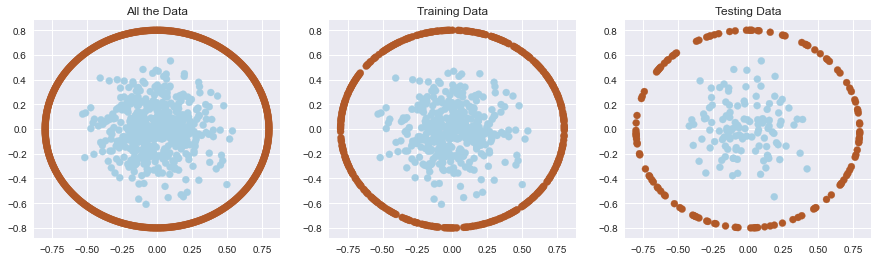

In [12]:
# Obtain samples from both the circle and the Gaussian classes
X_g, y_g = make_blobs(n_samples=1000, n_features=2, cluster_std=[0.2, 0.2], centers=[(0, 0), (0, 0)], random_state=0)
X_c, y_c = make_circles(n_samples=1000, random_state=0)

# Selects the samples
X = np.vstack((X_g[y_g == 0], X_c[y_c == 1]))
y = np.concatenate((y_g[y_g == 0], y_c[y_c == 1]))

# Splits the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Defines a ploting template
fig, axs = plt.subplots(1, 3, figsize=(15, 4))

# Plots all the data
axs[0].scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
axs[0].title.set_text("All the Data")

# Plots the training data
axs[1].scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.Paired)
axs[1].title.set_text("Training Data")

# Plots the testing data
axs[2].scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=plt.cm.Paired)
axs[2].title.set_text("Testing Data")

plt.show()

# Exercise 9

Use an SVM with a Gaussian kernel then a polynomial (with well-adapted parameters) then plot the decision boundaries of these algorithms on separate graphs.

**Solution:**

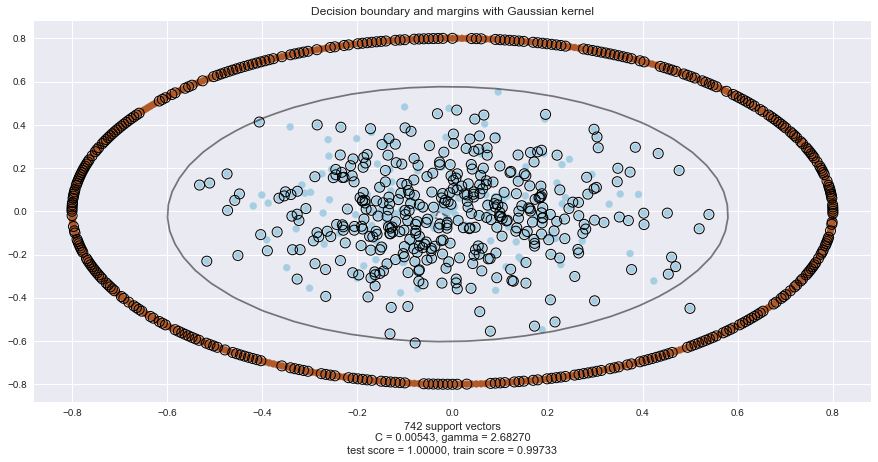

In [13]:
# Sets the parameters for the grid search with Gaussian kernel
params = {
    'kernel': ['rbf'], 
    'C': np.logspace(-3, 1, 50),
    'gamma': np.logspace(-3, 1, 50)
}

# Performs a grid search with cross validation
clf = GridSearchCV(svm.SVC(), params, n_jobs=-1)
clf.fit(X_train, y_train)

# Sets the results obtained with the cross validation
C = clf.best_params_['C']
gamma = clf.best_params_['gamma']
clf = clf.best_estimator_

# Saves the results of the Gaussian kernel
C_rbf = C
clf_rbf = clf
gamma_rbf = gamma
test_score_rbf = clf.score(X_test, y_test)
train_score_rbf = clf.score(X_train, y_train)

# Plots all the data
plt.figure(figsize=(15, 7))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
plt.title(f"Decision boundary and margins with Gaussian kernel")

# Obtains the current ax
ax = plt.gca()

# Obtains the hyperplanes
xlim = ax.get_xlim()
ylim = ax.get_ylim()
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)

# Plots the hyperplanes
plt.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])

# Highlight the support vectors
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100, linewidth=1, facecolors='none', edgecolors='k')

# Adds relevant results at the bottom
plt.xlabel(f"{len(clf_rbf.support_vectors_)} support vectors\nC = {C_rbf:.5f}, gamma = {gamma_rbf:.5f}\ntest score = {test_score_rbf:.5f}, train score = {train_score_rbf:.5f}")

plt.show()

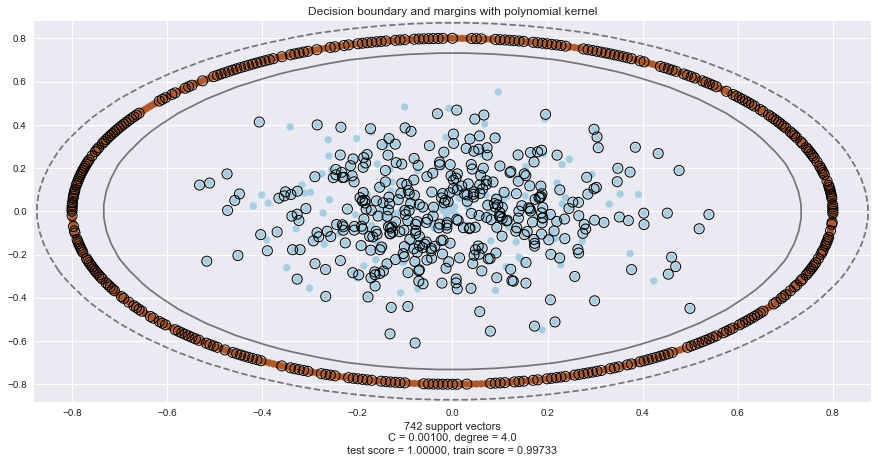

In [14]:
# Sets the parameters for the grid search with polynomial kernel
params = {
    'kernel': ['poly'], 
    'C': np.logspace(-3, 1, 50),
    'degree': np.linspace(1, 5, 5)
}

# Performs a grid search with cross validation
clf = GridSearchCV(svm.SVC(), params, n_jobs=-1)
clf.fit(X_train, y_train)

# Sets the results obtained with the cross validation
C = clf.best_params_['C']
degree = clf.best_params_['degree']
clf = clf.best_estimator_

# Saves the results of the polynomial kernel
C_poly = C
clf_poly = clf
degree_poly = degree
test_score_poly = clf.score(X_test, y_test)
train_score_poly = clf.score(X_train, y_train)

# Plots all the data
plt.figure(figsize=(15, 7))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
plt.title(f"Decision boundary and margins with polynomial kernel")

# Obtains the current ax
ax = plt.gca()

# Obtains the hyperplanes
xlim = ax.get_xlim()
ylim = ax.get_ylim()
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)

# Plots the hyperplanes
plt.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])

# Highlight the support vectors
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100, linewidth=1, facecolors='none', edgecolors='k')

# Adds relevant results at the bottom
plt.xlabel(f"{len(clf_poly.support_vectors_)} support vectors\nC = {C_poly:.5f}, degree = {degree_poly}\ntest score = {test_score_rbf:.5f}, train score = {train_score_rbf:.5f}")

plt.show()

# Exercise 10

We wish to compare classification performance between different SVMs based on different kernels
(linear, polynomial and Gaussian). Propose a method allowing to compare these three algorithms.

**Solution:**

To compare the performance of SVMs using different kernels we can run a grid search CV and obtain the best hyperparameters for each kernel.

In [15]:
# Sets the parameters for the grid search with linear kernel
params = {
    'kernel': ['linear'],
    'C': np.logspace(-2, 2, 20)
}

# Performs a grid search with cross validation
clf = GridSearchCV(svm.SVC(), params, n_jobs=-1)
clf.fit(X_train, y_train)

# Sets the results obtained with the cross validation
C = clf.best_params_['C']
train_score = clf.score(X_train, y_train)
test_score = clf.score(X_test, y_test)

# Prints the results obtained with the grid search
print(f"Optimal C = {C:.5f}")
print(f"Training score = {train_score:.5f}")
print(f"Testing score = {test_score:.5f}")

Optimal C = 0.48329
Training score = 0.64133
Testing score = 0.61600


In [16]:
# Sets the parameters for the grid search with Gaussian kernel
params = {
    'kernel': ['rbf'], 
    'C': np.logspace(-3, 1, 50),
    'gamma': np.logspace(-3, 1, 50)
}

# Performs a grid search with cross validation
clf = GridSearchCV(svm.SVC(), params, n_jobs=-1)
clf.fit(X_train, y_train)

# Sets the results obtained with the cross validation
C = clf.best_params_['C']
gamma = clf.best_params_['gamma']
train_score = clf.score(X_train, y_train)
test_score = clf.score(X_test, y_test)

# Prints the results obtained with the grid search
print(f"Optimal C = {C:.5f}")
print(f"Optimal gamma = {gamma:.5f}")
print(f"Training score = {train_score:.5f}")
print(f"Testing score = {test_score:.5f}")

Optimal C = 0.00543
Optimal gamma = 2.68270
Training score = 0.99733
Testing score = 1.00000


In [17]:
# Sets the parameters for the grid search with polynomial kernel
params = {
    'kernel': ['poly'],
    'C': np.logspace(-2, 2, 20),
    'degree': np.linspace(1, 5, 5)
}

# Performs a grid search with cross validation
clf = GridSearchCV(svm.SVC(), params, n_jobs=-1)
clf.fit(X_train, y_train)

# Sets the results obtained with the cross validation
C = clf.best_params_['C']
degree = clf.best_params_['degree']
train_score = clf.score(X_train, y_train)
test_score = clf.score(X_test, y_test)

# Prints the results obtained with the grid search
print(f"Optimal C = {C:.5f}")
print(f"Optimal degree = {degree}")
print(f"Training score = {train_score:.5f}")
print(f"Testing score = {test_score:.5f}")

Optimal C = 0.01000
Optimal degree = 4.0
Training score = 1.00000
Testing score = 1.00000


# Exercise 11

Draw the learning curve of the algorithm : with fixed hyper-parameters and fixed test set, calculate the training and test errors by using training sub-sets of training data of various sizes (drawn randomly). Plot the train and test error based on the size of the train set subset. Estimate and display the accuracy of the Bayes predictor on the same graph. Comment.

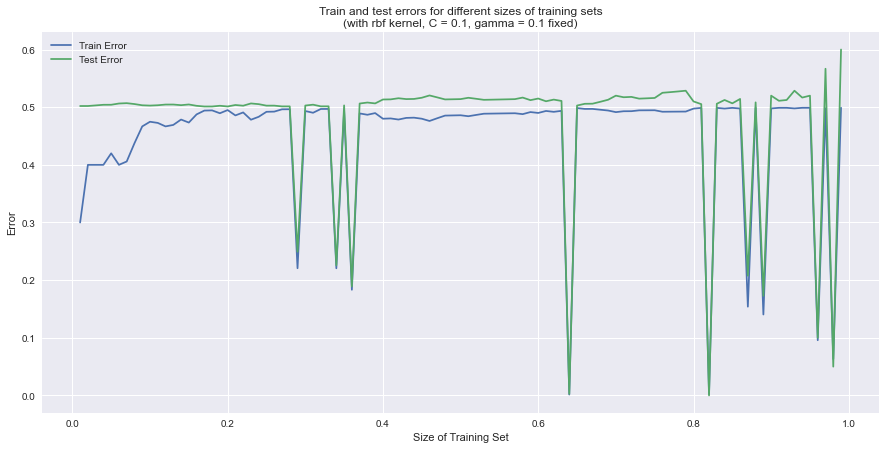

In [18]:
# Defines the space of possible training sets sizes
train_sizes = np.linspace(0.01, 0.99, 99)

# Defines the support vector classification params
kernel = 'rbf'
C = 0.1
gamma = 0.1

# Arrays to store errors
train_errors = []
test_errors = []

# Uses MSE for the prediction error as an estimation
for size in train_sizes:
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=size, random_state=0)
    clf = svm.SVC(kernel=kernel, C=C, gamma=gamma).fit(X_train, y_train)
    train_errors.append(np.mean((y_train - clf.predict(X_train))**2))
    test_errors.append(np.mean((y_test - clf.predict(X_test))**2))

# Plots the errors
plt.figure(figsize=(15, 7))
plt.plot(train_sizes, train_errors, label="Train Error")
plt.plot(train_sizes, test_errors, label="Test Error")
plt.title(f"Train and test errors for different sizes of training sets\n(with {kernel} kernel, C = {C}, gamma = {gamma} fixed)")
plt.xlabel("Size of Training Set")
plt.ylabel("Error")
plt.legend()
plt.show()

For the Gaussian distribution the PDF is well known. We propose the utilization of the following PDF for the circular distribution that surrounds the Gaussian generated points:

\begin{aligned}
\pi (x_1, x_2) = \begin{cases}
\frac{1}{2\pi}, & if \quad x_1^2 + x_2^2 = r^2 = (0.8)^2 \\
0, & if \quad otherwise
\end{cases}
\end{aligned}

In [19]:
def pdf_circle(x1, x2, r=0.8):
    return 1/(2*np.pi) if x1**2 + x2**2 == r**2 else 0

# Do a Monte-Carlo estimation of the Bayes Risk (given the gaussian distributions you used to generate data)
# Parameters for Monte Carlo esimation
n = 100000
bayes_risk = 0

# Using the 0-1 loss
# Computing the integral with the PDF from above described Gaussian
multinormal_class0 = multivariate_normal(mean=[0, 0], cov=[[0.04, 0],[0, 0.04]])

for i in range(n):
    x1 = np.random.uniform(-1, 1)
    x2 = np.random.uniform(-1, 1)
    max_prob = max(multinormal_class0.pdf([x1, x2]), pdf_circle(x1, x2))
    prob_sum = multinormal_class0.pdf([x1, x2]) + pdf_circle(x1, x2)                                                        
    bayes_risk += (1 - max_prob/prob_sum)

print(f"Estimated Bayes Risk is: {bayes_risk/n:f}")

Estimated Bayes Risk is: 0.000000


One can observe that, given the prior PDFs defined above, the Bayes Classifier can successfully predict all classes. This is because the probability distributions can be well distinguished when looking at their PDFs.

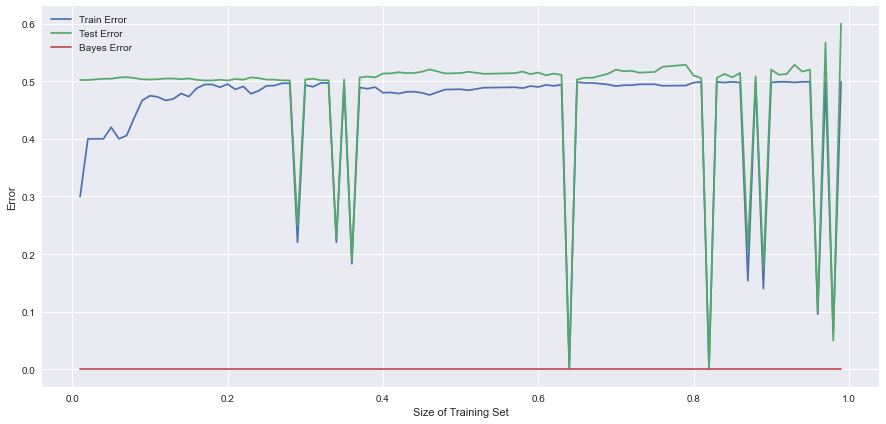

In [21]:
# Add this estimation to the plot of train/test error
plt.figure(figsize=(15,7))
plt.plot(train_sizes, train_errors)
plt.plot(train_sizes, test_errors)
plt.plot(train_sizes, [0 for i in range(len(train_sizes))])
plt.legend(["Train Error", "Test Error", "Bayes Error"])
plt.xlabel("Size of Training Set")
plt.ylabel("Error")
plt.show()

# Exercise 12

Add noise to the dataset by randomly modifying the labels of some training data. Then, draw the complexity curves of the algorithm : with set train and test set, draw the train and test error as a function of the complexity (i.e. as a function of the value of the hyper-parameter controlling the complexity, or the number of support vector). Comment.

**Solution:**

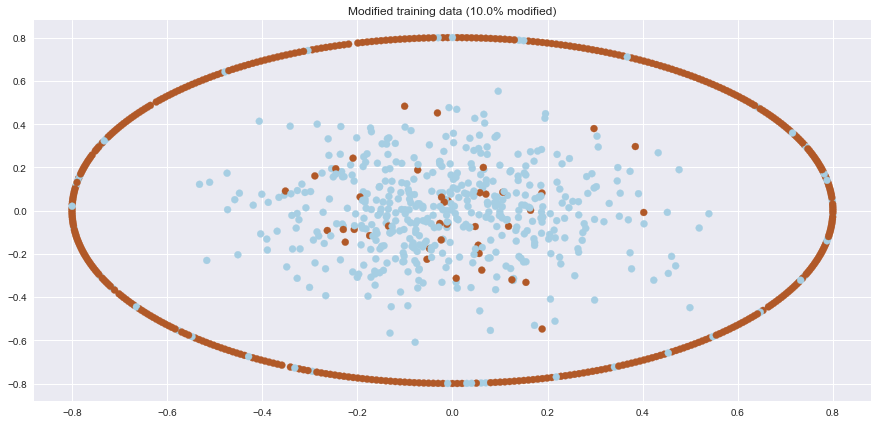

In [22]:
# Randomly modify 10% of the labels of the training data
pct_change = 0.1
for idx in np.random.randint(0, y_train.shape[0], int(pct_change*y_train.shape[0])):
    y_train[idx] = int(not y_train[idx])

# Plots the modified training data
plt.figure(figsize=(15, 7))
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.Paired)
plt.title(f"Modified training data ({100*pct_change}% modified)")
plt.show()

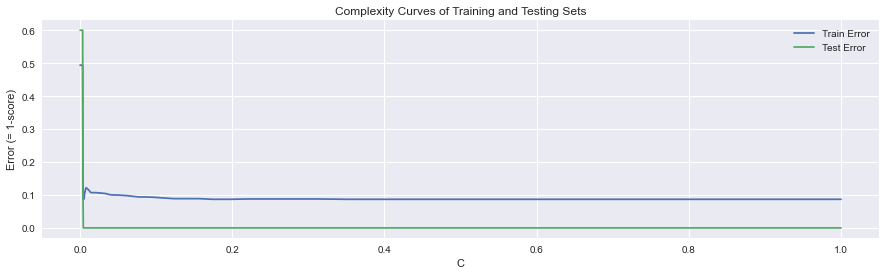

In [23]:
# Defines the regularization parameters
Cs = np.logspace(-5, 0, 100)

# Defines the scores arrays
train_scores = []
test_scores = []

for C in Cs:
    clf = svm.SVC(kernel='rbf', C=C)
    clf.fit(X_train, y_train)
    train_scores.append(1-clf.score(X_train, y_train))
    test_scores.append(1-clf.score(X_test, y_test))

# Plot the complexity curves
plt.figure(figsize=(15,4))
plt.plot(Cs, train_scores, label="Train Error")
plt.plot(Cs, test_scores, label="Test Error")
plt.title("Complexity Curves of Training and Testing Sets")
plt.xlabel("C")
plt.ylabel("Error (= 1-score)")
plt.legend()
plt.show()

As one can notice from the plot above, with the increase of the regularizationn parameter, the smaller is the errors (both from the training and testing sets). Once the C value is big enough, it stabilizes which means that we can predict the test data with a great precision, even with a noise inthe training set.

# Exercise 13

Start the script svm_gui.py available at the link: http://scikit-learn.org/stable/auto_examples/applications/svm_gui.html. This application allows real-time evaluation of the impact the choice of the kernel and the regularization parameter C.

In [ ]:
! python svm_gui.py

# Exercise 14

Generate a very unbalanced data set with much more points in one class than in the other (at least 90% vs 10%).


**Solution:**

The generated dataset is displayed below

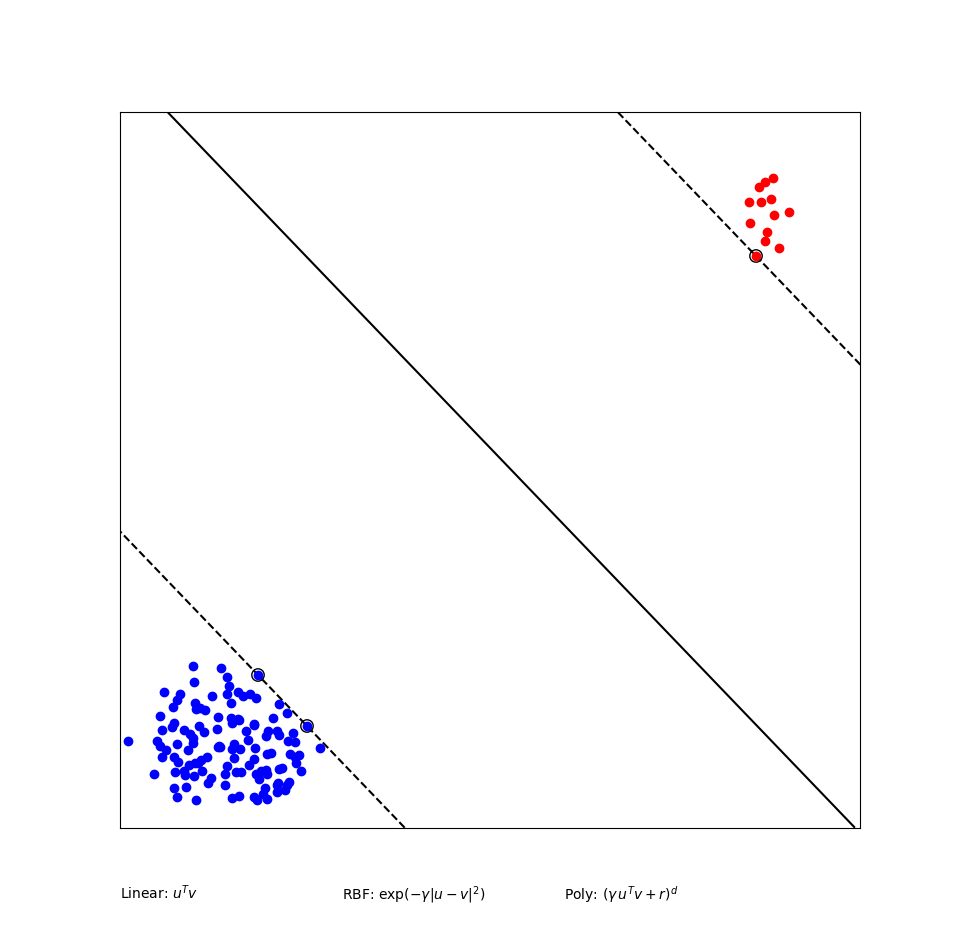

# Exercise 15

Using a linear kernel and decreasing the parameter C what do you observe?

**Solution:**

By changing the parameter C (regularization parameter) in the provided applet, we can observe that for small values of C, the optimization solution results in a greater margin but accepts more misclassifications. In the case of an extremely unbalaced dataset, the decrease in the value of C results in the situation where all the points belonging to the minority class are misclassified, as the hyperplane is moved putting all the points on the same side.

## Going further : application to face classification

Code for downloading and organizing the data:

In [24]:
###############################################################################
#               Face Recognition Task
###############################################################################
"""
The dataset used in this example is a preprocessed excerpt
of the "Labeled Faces in the Wild", aka LFW_:

  http://vis-www.cs.umass.edu/lfw/lfw-funneled.tgz (233MB)

  _LFW: http://vis-www.cs.umass.edu/lfw/

"""

from time import time
import pylab as pl
from sklearn.datasets import fetch_lfw_people


####################################################################
# Download the data (if not already on disk); load it as numpy arrays
lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4,
                              color=True, funneled=False, slice_=None,
                              download_if_missing=True)
# data_home='.'

# introspect the images arrays to find the shapes (for plotting)
images = lfw_people.images / 255.
n_samples, h, w, n_colors = images.shape

# the label to predict is the id of the person
target_names = lfw_people.target_names.tolist()

####################################################################
# Pick a pair to classify such as
names = ['Tony Blair', 'Colin Powell']
# names = ['Donald Rumsfeld', 'Colin Powell']

idx0 = (lfw_people.target == target_names.index(names[0]))
idx1 = (lfw_people.target == target_names.index(names[1]))
images = np.r_[images[idx0], images[idx1]]
n_samples = images.shape[0]
y = np.r_[np.zeros(np.sum(idx0)), np.ones(np.sum(idx1))].astype(np.int)

####################################################################
# Extract features

# features using only illuminations
X = (np.mean(images, axis=3)).reshape(n_samples, -1)

# # or compute features using colors (3 times more features)
# X = images.copy().reshape(n_samples, -1)

# Scale features
X -= np.mean(X, axis=0)
X /= np.std(X, axis=0)

####################################################################
# Split data into a half training and half test set
# X_train, X_test, y_train, y_test, images_train, images_test = \
#    train_test_split(X, y, images, test_size=0.5, random_state=0)
# X_train, X_test, y_train, y_test = \
#    train_test_split(X, y, test_size=0.5, random_state=0)

indices = np.random.permutation(X.shape[0])
train_idx, test_idx = indices[:int(X.shape[0] / 2)], indices[int(X.shape[0] / 2):]
X_train, X_test = X[train_idx, :], X[test_idx, :]
y_train, y_test = y[train_idx], y[test_idx]
images_train, images_test = images[train_idx, :, :, :], images[test_idx, :, :, :]

# Exercise 16

By modifying the followind code, show the influence of the regularization parameter. For example, the prediction error can be displayed as a function of C on a logarithmic scale between 1e5 and 1e-5.

**Solution:**


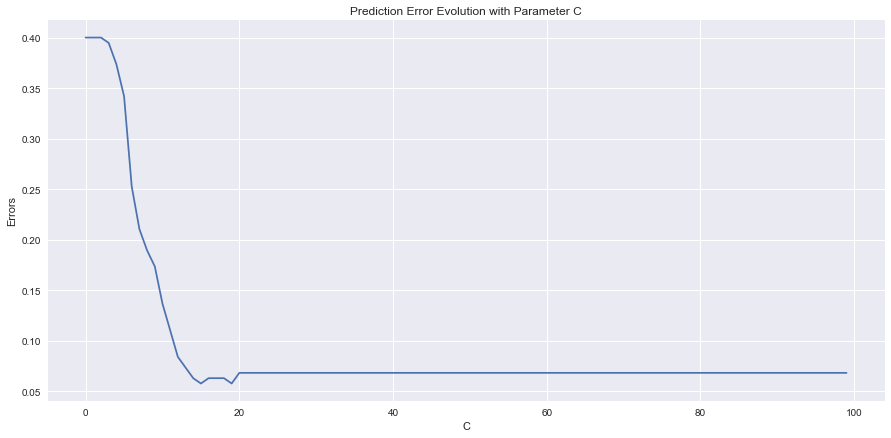

In [25]:
# Space of possible values for C
Cs = np.logspace(-5, 5, 100)
prediction_errors = []
scores = []

# Using the MSE as the prediction error
for C in Cs:
    clf = svm.SVC(kernel="linear", C=C)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    prediction_errors.append(np.mean((y_test - y_pred)**2))
    scores.append(clf.score(X_test, y_test))

plt.figure(figsize=(15,7))
plt.plot(prediction_errors)
plt.title("Prediction Error Evolution with Parameter C")
plt.xlabel("C")
plt.ylabel("Errors")
plt.show()

In [26]:
best_C = Cs[np.argmax(scores)]

In [27]:
####################################################################
# Quantitative evaluation of the model quality on the test set
print("Fitting the classifier to the training set")
t0 = time()

clf = svm.SVC(kernel="linear", C=best_C)
clf.fit(X_train, y_train)
score = clf.score(X_test, y_test)

Fitting the classifier to the training set


In [28]:
print("Predicting the people names on the testing set")
t0 = time()

# predict labels for the X_test images
y_pred = clf.predict(X_test)

print("done in %0.3fs" % (time() - t0))
print("Chance level : %s" % max(np.mean(y), 1. - np.mean(y)))
print("Accuracy : %s" % clf.score(X_test, y_test))

Predicting the people names on the testing set
done in 0.192s
Chance level : 0.6210526315789474
Accuracy : 0.9421052631578948


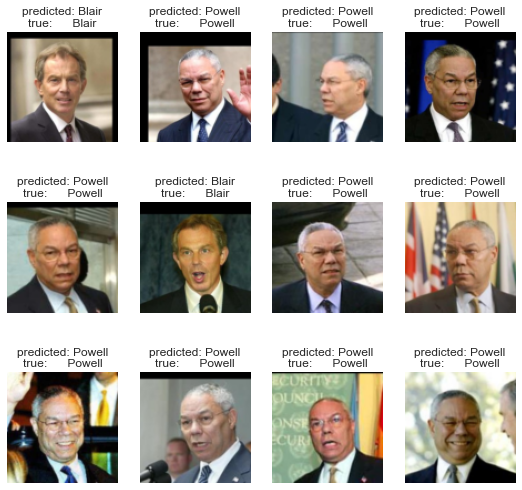

In [29]:
####################################################################
# Qualitative evaluation of the predictions using matplotlib

def plot_gallery(images, titles, n_row=3, n_col=4):
    """Helper function to plot a gallery of portraits"""
    pl.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    pl.subplots_adjust(bottom=0, left=.01, right=.99, top=.90,
                       hspace=.35)
    for i in range(n_row * n_col):
        pl.subplot(n_row, n_col, i + 1)
        pl.imshow(images[i])
        pl.title(titles[i], size=12)
        pl.xticks(())
        pl.yticks(())


def title(y_pred, y_test, names):
    pred_name = names[int(y_pred)].rsplit(' ', 1)[-1]
    true_name = names[int(y_test)].rsplit(' ', 1)[-1]
    return 'predicted: %s\ntrue:      %s' % (pred_name, true_name)

prediction_titles = [title(y_pred[i], y_test[i], names)
                     for i in range(y_pred.shape[0])]

plot_gallery(images_test, prediction_titles)
pl.show()

# Exercise 17

By adding nuisance variables, thus increasing the number of variables to the number of learning points fixed, show that performance drops.

**Solution:**

In [30]:
# Creating noise variables (1000 extra variables drawn at random)
extra_variables = np.random.randint(-100,100,(X.shape[0], 1000))

# Appending them to the original data
X_noise = np.hstack((X, extra_variables))

# Separating in train and test sets
train_idx, test_idx = indices[:int(X.shape[0] / 2)], indices[int(X.shape[0] / 2):]
X_train, X_test = X_noise[train_idx, :], X_noise[test_idx, :]
y_train, y_test = y[train_idx], y[test_idx]
images_train, images_test = images[train_idx, :, :, :], images[test_idx, :, :, :]

# Fitting the model and getting the score
clf = svm.SVC(kernel="linear", C=best_C)
clf.fit(X_train, y_train)
score = clf.score(X_test, y_test)

# Computing accuracy
print(f"Accuracy : {clf.score(X_test, y_test)}")

Accuracy : 0.5684210526315789


As observed above, the introduction of noise variables is responsible for a great drop in the model's performance. The accuracy dropped from 0.9157 to 0.5474 with the insertion of 1000 noise variables to the data.

# Exercise 18

Explain why the features are centered and reduced.

**Solution:**

Features are centered so their individual mean is 0 and so they all have the same expected value. This does not change the scale, which can be altered by the scaling process (in order to make their standard deviations equal). The reduction process aims at reducing the dimension of the feature space, and, by doing so, reduce the computation complexity.

# Exercise 19 

What is the effect of choosing a non-linear RBF kernel on prediction? You will be able to improve the prediction with a reduction of dimension based on the object sklearn.decomposition.RandomizedPCA.

**Solution:**


In [31]:
# Reloading the features
X = (np.mean(images, axis=3)).reshape(n_samples, -1)

# Centering and scaling
X -= np.mean(X, axis=0)
X /= np.std(X, axis=0)

# Separating in train and test sets
indices = np.random.permutation(X.shape[0])
train_idx, test_idx = indices[:int(X.shape[0] / 2)], indices[int(X.shape[0] / 2):]
X_train, X_test = X[train_idx, :], X[test_idx, :]
y_train, y_test = y[train_idx], y[test_idx]
images_train, images_test = images[train_idx, :, :, :], images[test_idx, :, :, :]

In [32]:
# Defining tuning hyperparameters
parameters = {'C' : np.logspace(-5,5,20),
              'gamma' : np.logspace(-2,2,20)}

# Running grid search for best parameters
clf = GridSearchCV(svm.SVC(kernel='rbf'), parameters, n_jobs=-1)

clf.fit(X_train, y_train)

best_gaussian_clf = clf.best_estimator_

# Displaying results
print("Accuracy:", best_gaussian_clf.score(X_test, y_test))
print("Best parameters:", clf.best_params_)

KeyboardInterrupt: 

It is clear from the above experiment, that the non-linear RBF kernel resulted in a less accurate prediction. This might be due to the fact that we have to optimize not only the value of C, but also the value of the hyperparameter gamma, leading to possible suboptimal situations.

In [ ]:
# Defining the PCA
pca = PCA(svd_solver='randomized')

# Fitting it to the training set
pca.fit(X_train)
components = pca.components_.T

last_component = np.where(np.cumsum(pca.explained_variance_ratio_) > 0.95)[0][0]


X_train_reduced = X_train@components[:, :last_component]
X_test_reduced = X_test@components[:, :last_component]

print(f"Reduced to {last_component + 1} features")

In [ ]:
Cs = np.logspace(-5,5,100)
params = {'C' : Cs}

clf = GridSearchCV(svm.SVC(kernel='linear'), params, n_jobs=-1)
clf.fit(X_train_reduced, y_train)

best_estimator_clf = clf.best_estimator_

print(f"Accuracy : {best_estimator_clf.score(X_test_reduced, y_test)}")

Despite not increasing the prediction accuracy, the feature space dimension reduction allowed for a smaller computation complexity, achieving a reasonable perfomance with a much lesser time consuming calculation.